## **Capítulo 4: Análise de Retornos**

Até agora, trabalhamos com séries de preços. No entanto, para analisar o desempenho de um ativo, o preço absoluto não é a melhor medida. [cite_start]Por exemplo, qual foi o melhor investimento? [cite: 349]

* Um ativo que subiu de R$ 10 para R$ 20 (lucro de R$ 10).
* Um ativo que subiu de R$ 100 para R$ 105 (lucro de R$ 5).

Embora o primeiro tenha dado um lucro maior em reais, o seu retorno percentual foi de 100%, enquanto o do segundo foi de apenas 5%. [cite_start]Para poder comparar ativos diferentes de forma justa, usamos os **retornos**, que representam a variação percentual no preço dos nossos investimentos[cite: 382].

### **4.1 Retornos Simples (Aritméticos)**

O retorno simples, ou aritmético, é a forma mais intuitiva de calcular a performance. [cite_start]Ele mede a variação percentual do preço de um dia para o outro[cite: 426]. A fórmula é:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Onde:
* $P_t$ é o preço de hoje.
* $P_{t-1}$ é o preço de ontem.

No Pandas, não precisamos aplicar essa fórmula manualmente. Usamos o método `.pct_change()`, que faz isso de forma automática e eficiente.

In [2]:
import yfinance as yf
import pandas as pd

# Vamos baixar dados da ITSA4 para usar como exemplo
itsa4 = yf.download('ITSA4.SA', start='2022-01-01', end='2023-12-31', auto_adjust=False)

print(itsa4.head())

# Vamos usar a coluna de fechamento ajustado ('Adj Close') para calcular os retornos
# O método .pct_change() calcula a variação percentual entre cada linha
itsa4['retorno_simples'] = itsa4['Adj Close'].pct_change()

# Vamos visualizar as colunas de preço e o retorno calculado
# Note que o primeiro valor do retorno é 'NaN' (Not a Number), pois não há um dia anterior para comparar.
print(itsa4[['Adj Close', 'retorno_simples']].head())

# Visualizando o final da série
print("\n" + "="*40 + "\n")
print(itsa4[['Adj Close', 'retorno_simples']].tail())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open    Volume
Ticker      ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA
Date                                                                  
2022-01-03  5.547341  7.406317  7.545904  7.324207  7.406317  34761437
2022-01-04  5.590393  7.463794  7.529482  7.365262  7.414528  47291709
2022-01-05  5.528891  7.381684  7.480216  7.324207  7.430950  42275995
2022-01-06  5.578092  7.447372  7.504849  7.340629  7.373473  30914401
2022-01-07  5.645742  7.537693  7.545904  7.398106  7.447372  26119001
Price      Adj Close retorno_simples
Ticker      ITSA4.SA                
Date                                
2022-01-03  5.547341             NaN
2022-01-04  5.590393        0.007761
2022-01-05  5.528891       -0.011001
2022-01-06  5.578092        0.008899
2022-01-07  5.645742        0.012128


Price      Adj Close retorno_simples
Ticker      ITSA4.SA                
Date                                
2023-12-21  8.203968   

## **4.2 Composição de Retornos Simples (Retorno Acumulado)**

Um erro comum é achar que para saber o retorno de uma semana, basta somar os retornos diários. Isso não funciona para retornos simples. O correto é compor os retornos, ou seja, multiplicar os fatores de crescimento diários.

A fórmula para compor o retorno de dois dias, por exemplo, é:

[cite_start]`Retorno Total = (1 + Retorno Dia 1) * (1 + Retorno Dia 2) - 1` [cite: 1048]

Para uma série longa de retornos, calculamos o **produto acumulado**. O resultado é um **"índice de riqueza"**, que nos mostra o quanto R$1,00 investido no primeiro dia teria se tornado ao longo do tempo. No Pandas, fazemos isso de forma muito fácil com o método `.cumprod()`.

--- Retorno Acumulado (Índice de Riqueza) ---
Price      Adj Close retorno_simples retorno_acumulado
Ticker      ITSA4.SA                                  
Date                                                  
2022-01-03  5.547341             NaN               NaN
2022-01-04  5.590393        0.007761          1.007761
2022-01-05  5.528891       -0.011001          0.996674
2022-01-06  5.578092        0.008899          1.005543
2022-01-07  5.645742        0.012128          1.017738


Price      Adj Close retorno_simples retorno_acumulado
Ticker      ITSA4.SA                                  
Date                                                  
2023-12-21  8.203968        0.007984          1.478901
2023-12-22  8.325807        0.014851          1.500864
2023-12-26  8.350179        0.002927          1.505258
2023-12-27  8.415160        0.007782          1.516972
2023-12-28  8.423283        0.000965          1.518436


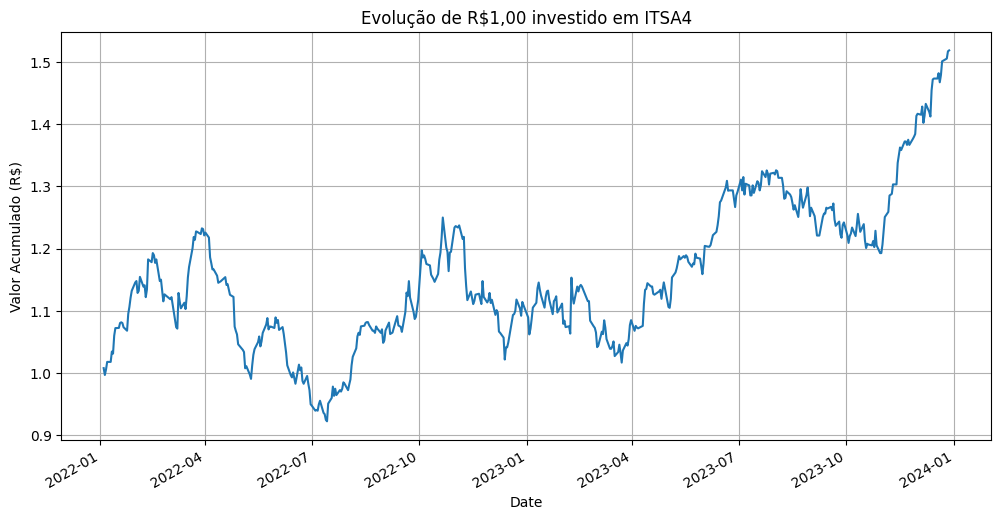

In [4]:
import matplotlib.pyplot as plt
# Usando o DataFrame 'itsa4' que já possui a coluna 'retorno_simples'

# Passo 1: Adicionamos 1 a cada retorno diário para obter o fator de crescimento.
# Ex: um retorno de 0.02 (2%) vira um fator de 1.02.
fatores_crescimento = 1 + itsa4['retorno_simples']

# Passo 2: Usamos .cumprod() para calcular o produto acumulado (o nosso índice de riqueza)
itsa4['retorno_acumulado'] = fatores_crescimento.cumprod()

# Vamos visualizar o resultado
print("--- Retorno Acumulado (Índice de Riqueza) ---")
# O valor mostra o quanto R$1,00 teria se tornado até aquela data
print(itsa4[['Adj Close', 'retorno_simples', 'retorno_acumulado']].head())
print("\n" + "="*50 + "\n")
print(itsa4[['Adj Close', 'retorno_simples', 'retorno_acumulado']].tail())


# --- Visualização do Retorno Acumulado ---
itsa4['retorno_acumulado'].plot(figsize=(12,6), title='Evolução de R$1,00 investido em ITSA4')
plt.ylabel('Valor Acumulado (R$)')
plt.grid(True)
plt.show()

## **4.3 Retornos Logarítmicos (Log Returns)**

Além dos retornos simples, existe outra forma de cálculo muito utilizada, especialmente em modelos acadêmicos e quantitativos: os **retornos logarítmicos**.

Eles são preferidos em muitas análises estatísticas por suas propriedades matemáticas vantajosas. A fórmula é:

$r_t = \log(\frac{P_t}{P_{t-1}}) = \log(P_t) - \log(P_{t-1})$ 

A principal vantagem dos log returns é que eles são **aditivos no tempo**. Isso significa que para calcular o retorno acumulado, basta **somar** os retornos diários, o que simplifica muito os cálculos.

In [5]:
import numpy as np # Precisaremos do numpy para a função de log

# Usando o DataFrame 'itsa4'
# Para calcular o log return:
# 1. Pegamos o logaritmo natural de cada preço de fechamento ajustado com np.log()
# 2. Usamos o método .diff() para calcular a diferença de um dia para o outro (log(Pt) - log(Pt-1))
itsa4['retorno_log'] = np.log(itsa4['Adj Close']).diff()

# Vamos comparar o retorno simples com o logarítmico
# Note como os valores são muito próximos para variações pequenas
print(itsa4[['retorno_simples', 'retorno_log']].head())

Price      retorno_simples retorno_log
Ticker                                
Date                                  
2022-01-03             NaN         NaN
2022-01-04        0.007761    0.007731
2022-01-05       -0.011001   -0.011062
2022-01-06        0.008899    0.008859
2022-01-07        0.012128    0.012055


Como os log returns são aditivos, para saber o retorno acumulado de todo o período, simplesmente somamos todos os retornos logarítmicos diários.

Para converter o log return total de volta para um retorno simples (que é mais fácil de interpretar), usamos a função exponencial (`exp`), pois ela é a operação inversa do logaritmo.

`Retorno Simples Total = exp(Soma dos Log Returns) - 1`

In [6]:
# Calculando o retorno total do período somando todos os log returns diários
retorno_log_total = itsa4['retorno_log'].sum()
print(f"Retorno Logarítmico Total no Período: {retorno_log_total:.4f}")


# Convertendo o retorno log total para o formato de retorno simples
retorno_simples_total = np.exp(retorno_log_total) - 1
print(f"Retorno Simples Total no Período (calculado via log): {retorno_simples_total:.4f}")


# Vamos comparar com o valor final da coluna 'retorno_acumulado' que calculamos na seção anterior
# O valor deve ser o mesmo! (descontando o -1 inicial)
ultimo_valor_acumulado = itsa4['retorno_acumulado'].iloc[-1]
print(f"Retorno Simples Total no Período (calculado via cumprod): {(ultimo_valor_acumulado - 1):.4f}")

Retorno Logarítmico Total no Período: 0.4177
Retorno Simples Total no Período (calculado via log): 0.5184
Retorno Simples Total no Período (calculado via cumprod): 0.5184


## **4.4 Qual Retorno Usar? Simples ou Logarítmico?**

Faz sentido ter duas formas de calcular retornos? Sim, pois cada uma tem sua utilidade.

* **Retornos Simples:** São mais intuitivos ("o ativo subiu 2%"). São usados para calcular o retorno de uma carteira de ativos.
* **Retornos Logarítmicos:** São matematicamente mais fáceis de manipular (são aditivos) e suas propriedades estatísticas são mais convenientes.Por isso, são o padrão em finanças quantitativas e na maioria dos modelos de risco.

**Regra geral:** Para a maioria das análises estatísticas, como cálculo de volatilidade e retorno esperado que faremos a seguir, usaremos os **retornos logarítmicos**.

### **4.5 Retorno Esperado e Anualização**

O **retorno esperado** é uma estimativa do retorno que podemos esperar de um ativo no futuro, com base em seu comportamento passado. A forma mais simples de estimá-lo é calcular a **média aritmética** dos retornos logarítmicos diários.

Como os retornos diários são muito pequenos, é uma prática padrão **anualizar** o retorno para poder compará-lo com benchmarks de mercado (como o CDI ou a SELIC). Para anualizar um retorno diário, simplesmente o multiplicamos pelo número de dias úteis em um ano, que no mercado brasileiro é convencionalmente **252**.

In [ ]:
# Usando o DataFrame 'itsa4' que já tem a coluna 'retorno_log'

# Calculando o retorno esperado diário (a média dos log returns)
retorno_medio_diario = itsa4['retorno_log'].mean()
print(f"Retorno Esperado Diário: {retorno_medio_diario:.5%}")

# Anualizando o retorno
retorno_anualizado = retorno_medio_diario * 252
print(f"Retorno Esperado Anualizado: {retorno_anualizado:.2%}")

### **4.6 Risco Esperado (Volatilidade) e Anualização**

O **risco esperado** de um ativo é a sua **volatilidade**. Uma volatilidade alta significa que os retornos do ativo variam muito, tornando-o mais arriscado. A medida mais comum para a volatilidade é o **desvio padrão** dos retornos logarítmicos.

Assim como o retorno, também anualizamos a volatilidade. A regra, baseada em princípios estatísticos, é multiplicar a volatilidade diária pela **raiz quadrada** do número de períodos.

`Volatilidade Anualizada = Volatilidade Diária * raiz_quadrada(252)` 

In [ ]:
import numpy as np # Precisamos do numpy para a raiz quadrada (sqrt)

# Calculando o risco diário (desvio padrão dos log returns)
vol_diaria = itsa4['retorno_log'].std()
print(f"Risco (Volatilidade) Diária: {vol_diaria:.5%}")

# Anualizando a volatilidade
vol_anualizada = vol_diaria * np.sqrt(252)
print(f"Risco (Volatilidade) Anualizado: {vol_anualizada:.2%}")

print(f"\nResumo ITSA4: Retorno Anualizado de {retorno_anualizado:.2%} com Risco de {vol_anualizada:.2%}")

## **4.7 Exercícios Práticos**

### Exercício 1: Análise Comparativa de Ativos

Vamos fazer uma análise completa de Risco vs. Retorno para um portfólio de 5 ativos brasileiros.

**Sua Tarefa:**

1.  **Obter Dados:** Baixe os preços de fechamento ajustado (`Adj Close`) para os seguintes ativos de **01/01/2015 a 31/12/2020**: 
    * `PETR4.SA` (Petrobras PN)
    * `LREN3.SA` (Lojas Renner)
    * `ABEV3.SA` (Ambev)
    * `BOVA11.SA` (ETF do Ibovespa)
    * `^BVSP` (Índice Ibovespa)

2.  **Limpar Dados:** As séries podem ter dados faltantes (`NaN`). Remova todas as linhas que contenham qualquer valor `NaN` para garantir que todos os ativos tenham dados para as mesmas datas. (Dica: método `.dropna()`) 

3.  **Calcular Retornos:** Calcule os retornos **logarítmicos** diários para todos os ativos. 

4.  **Anualizar Métricas:** Calcule o **retorno esperado anualizado** e a **volatilidade esperada anualizada** para cada um dos ativos. 

5.  **Apresentar Resultados:** Crie um novo DataFrame para apresentar os resultados finais de forma clara, com os tickers como índice e duas colunas: "Retorno Anualizado" e "Volatilidade Anualizada".

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 1. Obter Dados
tickers = ['PETR4.SA', 'LREN3.SA', 'ABEV3.SA', 'BOVA11.SA', '^BVSP']
start_date = '2015-01-01'
end_date = '2020-12-31'

# ... seu código para baixar os dados aqui ...


# 2. Limpar Dados Faltantes
# ... seu código para usar .dropna() aqui ...


# 3. Calcular Retornos Logarítmicos
# ... seu código para calcular os log returns aqui ...


# 4. Anualizar Métricas
# Lembre-se: Retorno = média * 252
# Lembre-se: Volatilidade = desvio padrão * raiz_quadrada(252)
# ... seu código para calcular o retorno e a volatilidade anualizada aqui ...


# 5. Apresentar Resultados
# ... seu código para criar e imprimir o DataFrame final aqui ...